In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.read_csv('movies_cleaned.csv')

,imdb_id,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,33,Jurassic World,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015,137999939,1392445893
1,tt1392190,28,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015,137999939,348161292
2,tt2908446,13,Insurgent,Robert Schwentke,119,Adventure,Summit Entertainment,2480,6.3,2015,101199956,271619025
3,tt2488496,11,Star Wars: The Force Awakens,J.J. Abrams,136,Action,Lucasfilm,5292,7.5,2015,183999919,1902723130
4,tt2820852,9,Furious 7,James Wan,137,Action,Universal Pictures,2947,7.3,2015,174799923,1385748801
...,...,...,...,...,...,...,...,...,...,...,...,...
3849,tt0061184,1,Who's Afraid of Virginia Woolf?,Mike Nichols,131,Drama,Chenault Productions,74,7.5,1966,50385110,226643572
3850,tt0061107,0,Torn Curtain,Alfred Hitchcock,128,Mystery,Universal Pictures,46,6.3,1966,20154044,87334191
3851,tt0061619,0,El Dorado,Howard Hawks,120,Action,Paramount Pictures,36,6.9,1966,31258922,40308088
3852,tt0060934,0,The Sand Pebbles,Robert Wise,182,Action,Twentieth Century Fox Film Corporation,28,7.0,1966,80616176,134360294


In [3]:
df = pd.read_csv('movies_cleaned.csv')

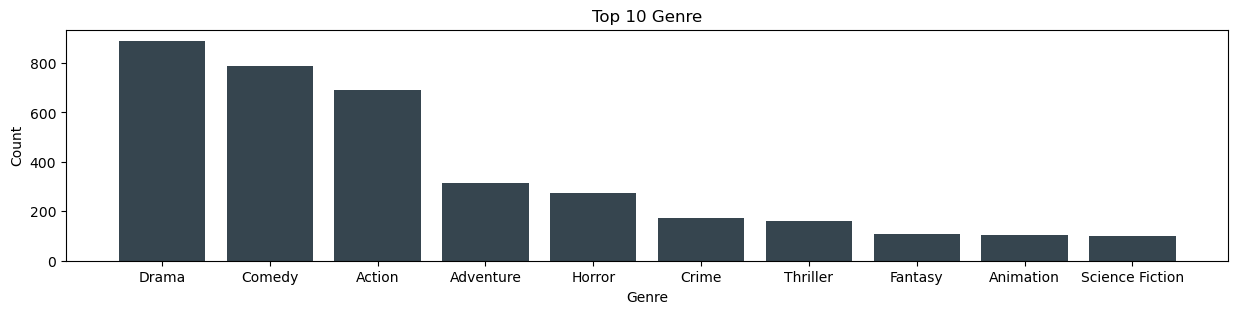

In [4]:
# Which genres appear frequently (Top 10)?

No_of_genre = df['genres'].value_counts().head(10)
No_of_genre

plt.figure(figsize=(15,3))
plt.bar(x = No_of_genre.index, height = No_of_genre.values, color = '#36454F')
plt.title('Top 10 Genre')
plt.xlabel ('Genre')
plt.ylabel ('Count')
plt.show()

# The Drama Genre tend to appear the most follow by comedy in this dataset

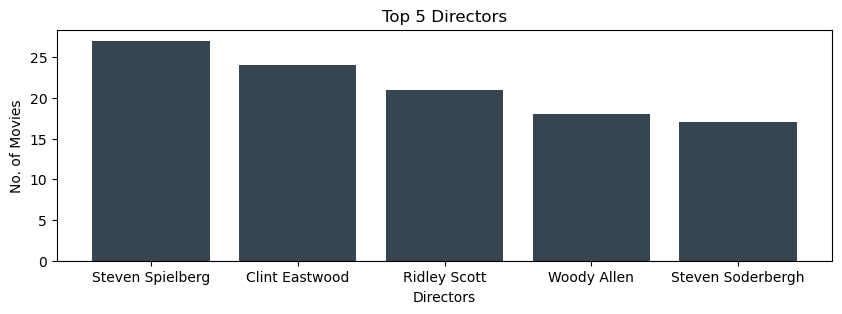

In [5]:
# Which directors have directed the most movies (top 5)?

directorbymoviecount = df['director'].value_counts().head(5)
directorbymoviecount

plt.figure(figsize=(10,3))
plt.bar(x = directorbymoviecount.index, height = directorbymoviecount.values, color = '#36454F')
plt.title('Top 5 Directors')
plt.xlabel ('Directors')
plt.ylabel ('No. of Movies')
plt.show()

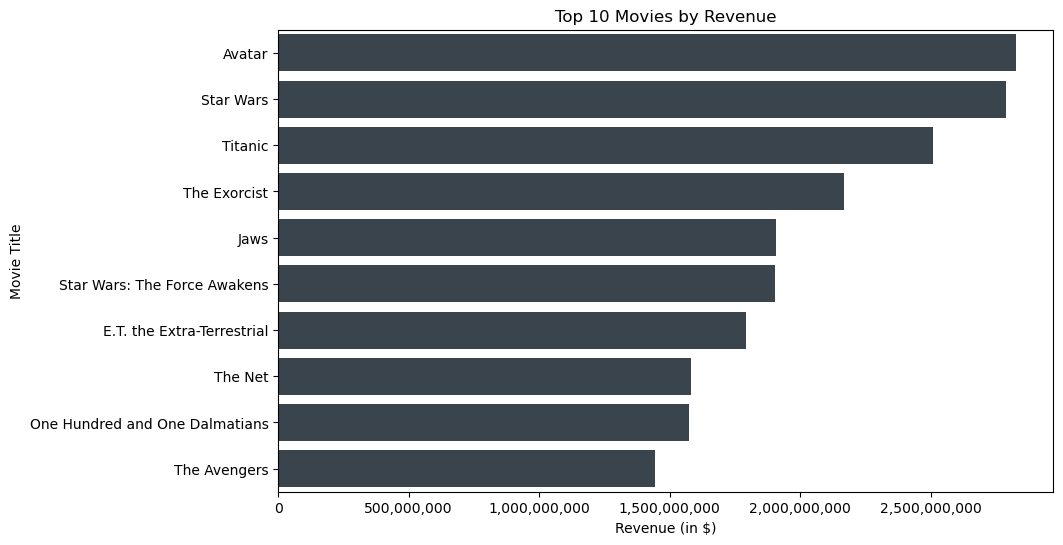

In [10]:
# Top 10 movies with the highest revenue

top_revenue_movies = df.sort_values(by='revenue_adj', ascending=False).head(10)

# Format revenue as whole numbers with comma separators
top_revenue_movies['Revenue'] = top_revenue_movies['revenue_adj'].apply(lambda x: f"{int(x):,}")

# Display title and formatted revenue
top_moviebyrev = top_revenue_movies[['original_title', 'Revenue']].reset_index(drop=True)

top_moviebyrev

top_revenue_movies_sorted = top_revenue_movies.sort_values(by='revenue_adj', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x='revenue_adj', y='original_title', data=top_revenue_movies_sorted, color = '#36454F')
plt.xlabel('Revenue (in $)')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Revenue')
plt.ticklabel_format(style='plain', axis='x')  

# Format x-axis with commas
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

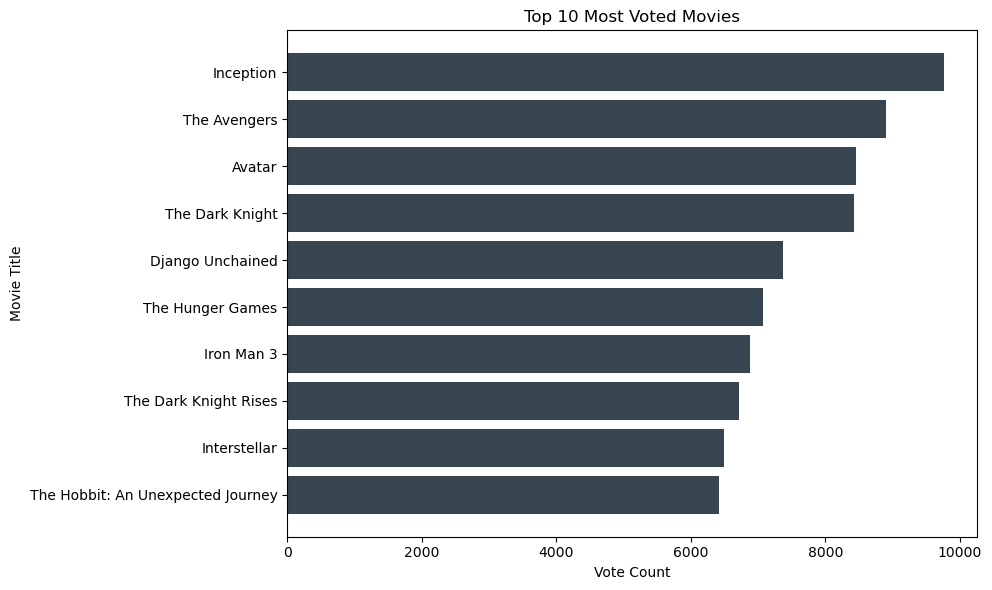

In [11]:

# What are the top movies by vote
top_voted_movies = df.sort_values(by='vote_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_voted_movies['original_title'], top_voted_movies['vote_count'], color='#36454F')
plt.xlabel("Vote Count")
plt.ylabel("Movie Title")
plt.title("Top 10 Most Voted Movies")
plt.gca().invert_yaxis()  # So highest is at the top
plt.tight_layout()
plt.show()


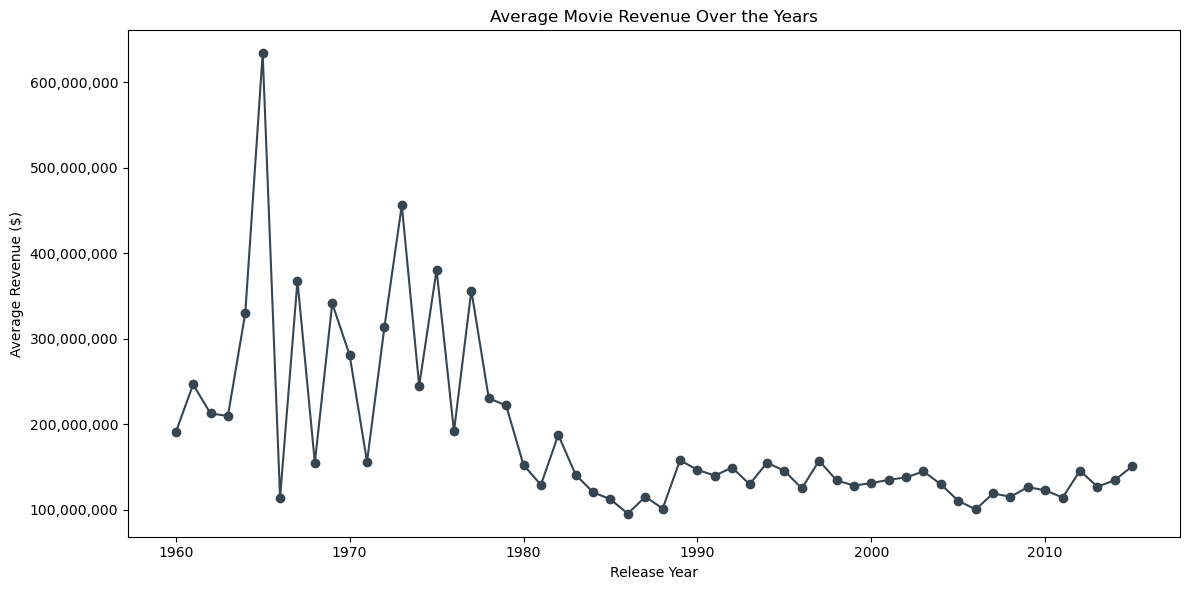

In [12]:

# What is the average revenue for each year?

revenue_by_year = df.groupby('release_year')['revenue_adj'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(revenue_by_year['release_year'], revenue_by_year['revenue_adj'], marker='o', color = '#36454F')
plt.title('Average Movie Revenue Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue ($)')

# Format Y-axis with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


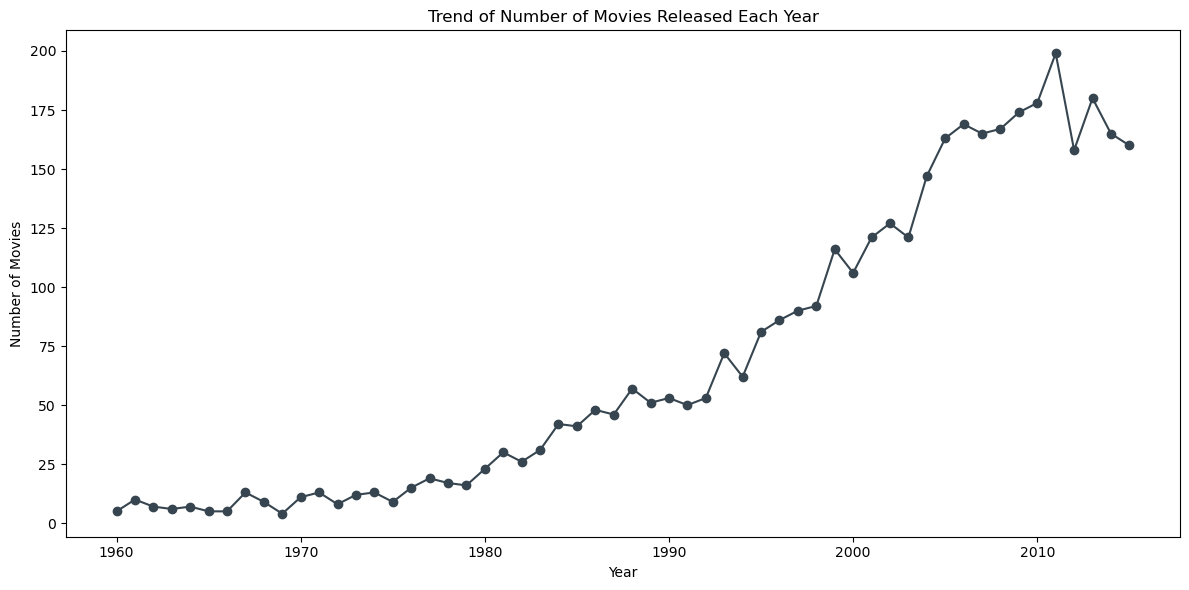

In [13]:
# Number of movies released each year 

movies_per_year = df.groupby('release_year').size()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color = '#36454F')
plt.title('Trend of Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


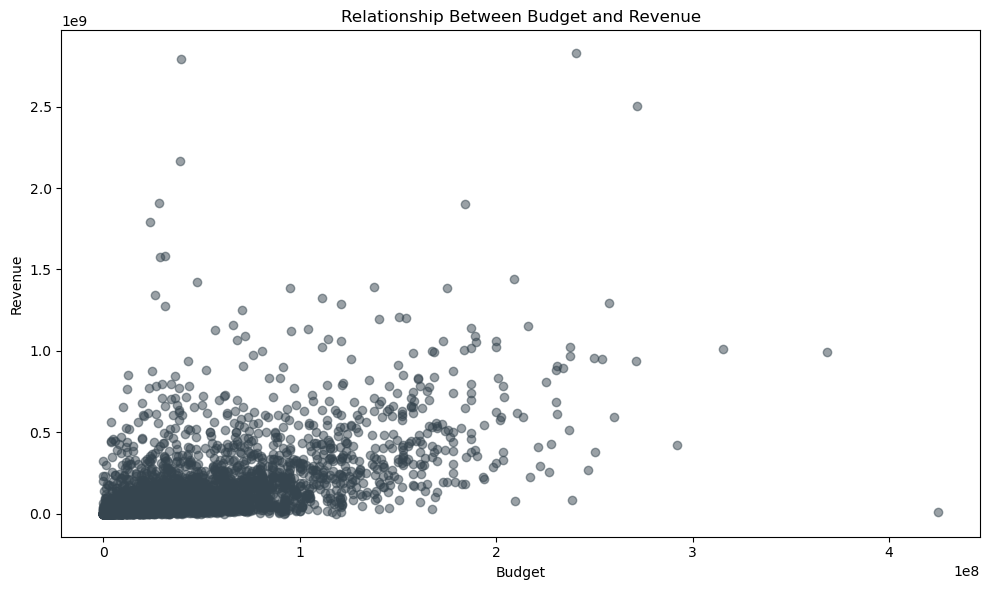

In [14]:
# What is the relationship between budget and revenue

plt.figure(figsize=(10, 6))
plt.scatter(df['budget_adj'], df['revenue_adj'], alpha=0.5, color = '#36454F')
plt.title('Relationship Between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

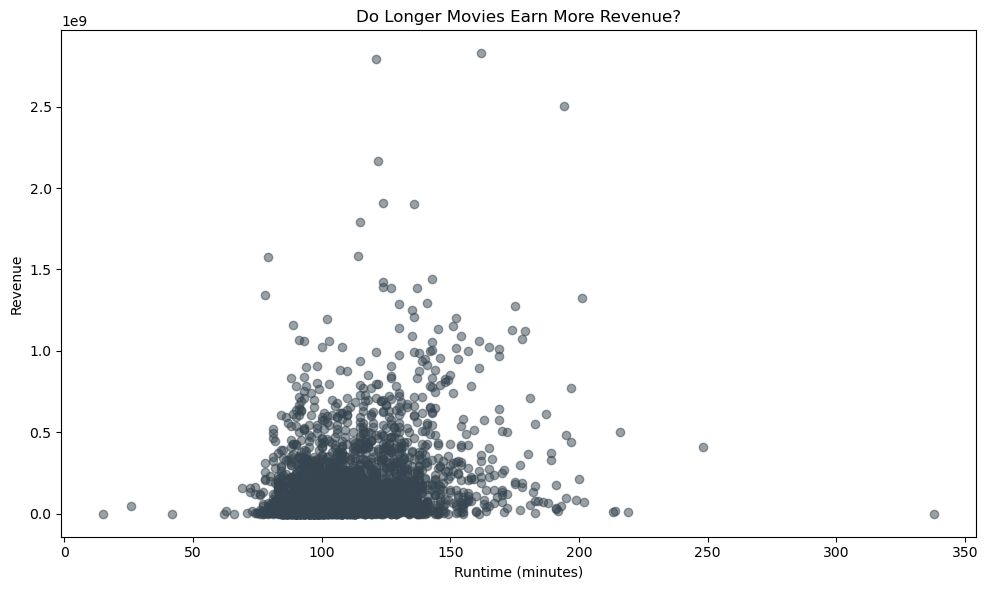

In [15]:

# Is there a relationship between Runtime vs Revenue (Does higher runtime yield higher revenue?)

plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['revenue_adj'], alpha=0.5, color = '#36454F' )
plt.title('Do Longer Movies Earn More Revenue?')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


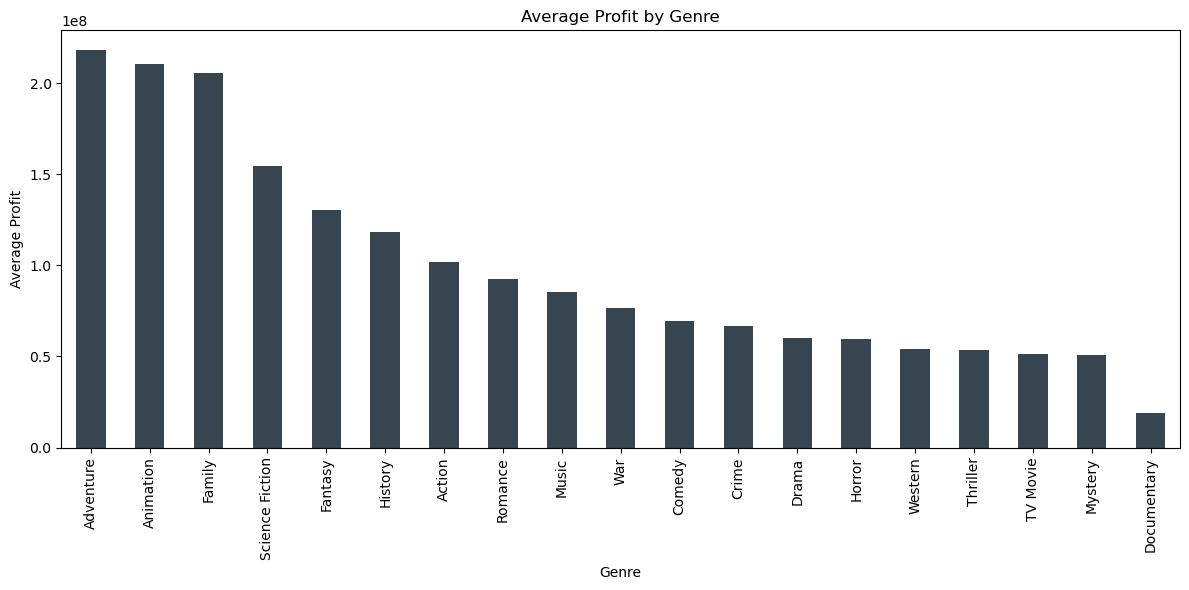

In [16]:

#Total profit made by each Genre of movie

# Caculating the profit made
df['profit'] = df['revenue_adj'] - df['budget_adj']

# Group by genre and calculate average profit
genre_profit = df.groupby('genres')['profit'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_profit.plot(kind='bar', color = '#36454F')
plt.title('Average Profit by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Profit')
plt.tight_layout()
plt.show()


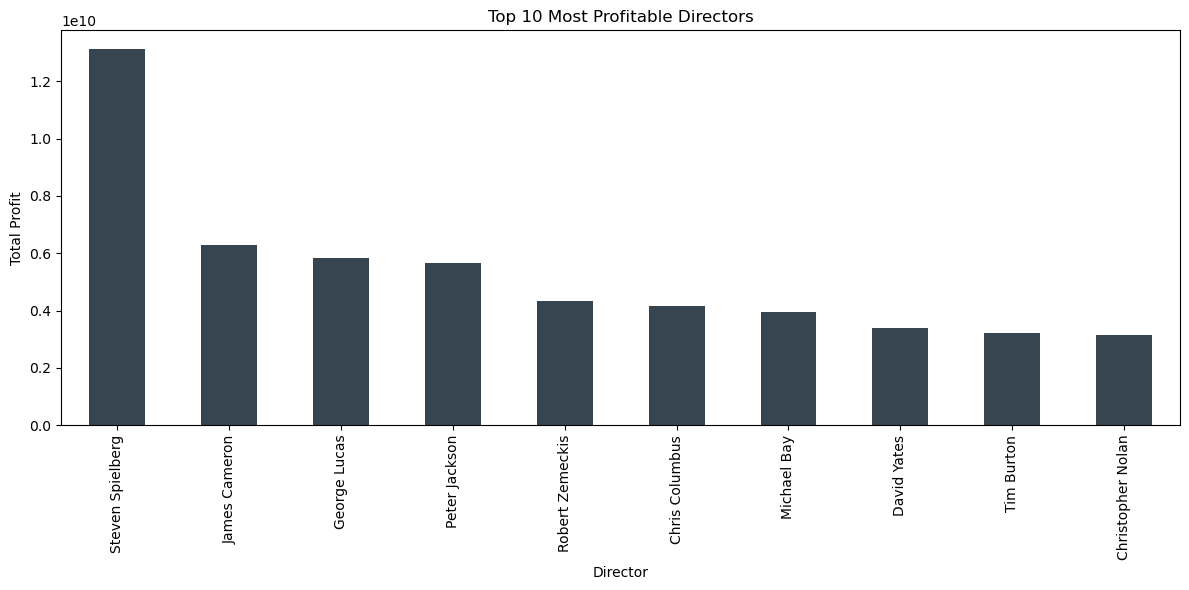

In [18]:
# Who are the top 10 director that are most profitable 

director_profit = df.groupby('director')['profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
director_profit.plot(kind='bar', color = '#36454F')
plt.title('Top 10 Most Profitable Directors')
plt.xlabel('Director')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()